# Kaggle Competition: Facial Expression Recognition

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

## Data Exploration

### Overview of Dataset

In [1]:
import pandas as pd
import numpy as np
import cv2
from IPython.display import display
import matplotlib.pyplot as plt

data = pd.read_csv("fer2013.csv")
display(data.head(n=10))

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [39]:
print ("\033[1mThe total number of rows in dataset\033[0m\n")
print (data.count())

print ("\n\033[1mAll the keywords with their starting index in 'Usage' column\033[0m")
usage_ix = data.drop_duplicates('Usage')['Usage']
print (data.drop_duplicates('Usage')['Usage'])
usage_ix = usage_ix.index

print ("\nThere are", len(data.drop_duplicates('emotion')['emotion'].values),"Labels in total for each emotion")
print (data.drop_duplicates('emotion')['emotion'].values)

The total number of rows in dataset

emotion    35887
pixels     35887
Usage      35887
dtype: int64

All the keywords with their starting index in 'Usage' column
0           Training
28709     PublicTest
32298    PrivateTest
Name: Usage, dtype: object

There are 7 Labels in total for each emotion
[0 2 4 6 3 5 1]


### Dataset Classification

In [40]:
def dataset_clf(data, usage_ix):
    """Classify the dataset based on the keyword in 'Usage' column, and divide training data into batches.
       Finally, save all sub-dataset into csv file.
    
    Args:
       data: DataFrame of raw dataset
       usage_ix: A list of index of unique keywords in 'Usage' column
    """
    ix = 0
    n_batches = 6    # tunable
    batch_size = 5000    # tunable

    for batch_i in range(1,n_batches+1):    # divide and save training data into 6 batches
        
        if (usage_ix[1]-1)-ix < batch_size:
            data.loc[ix : usage_ix[1]-1].to_csv("training_batch_"+str(batch_i)+".csv")
            print ("File 'training_batch_"+str(batch_i)+".csv' saved successfully")
 
        else:
            data.loc[usage_ix[0] + ix : ix + (batch_size-1)].to_csv("training_batch_"+str(batch_i)+".csv")
            print ("File 'training_batch_"+str(batch_i)+".csv' saved successfully")
            
        ix += batch_size

    data.loc[usage_ix[1]:usage_ix[2]-1].to_csv("public_test.csv")    # save public testing data
    print ("File 'public_test.csv' saved successfully")

    data.loc[usage_ix[2]:].to_csv("private_test.csv")    # save private testing data
    print ("File 'private_test.csv' saved successfully")

    return None

dataset_clf(data, usage_ix)

File 'training_batch_1.csv' saved successfully
File 'training_batch_2.csv' saved successfully
File 'training_batch_3.csv' saved successfully
File 'training_batch_4.csv' saved successfully
File 'training_batch_5.csv' saved successfully
File 'training_batch_6.csv' saved successfully
File 'public_test.csv' saved successfully
File 'private_test.csv' saved successfully


### Sample Image

[Image Info]

Batch: 1 
Example of image 1212 with shape of: (48, 48)
Label (Emotion): 3

[Pixel Info]

First 18 pixels: [155, 153, 154, 153, 154, 154, 154, 154, 153, 153, 154, 154, 154, 161, 115, 66, 64, 67] 
Max value of pixels: 235 
MIn value of pixels: 0


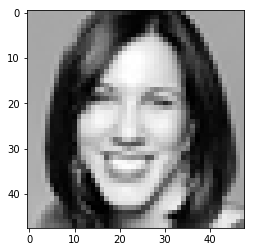

Picture saved?
 True


In [100]:
batch_num = 1     # the batch number (tunable)
eximg_ix = 1212    # the index of sample image to be displayed (tunable), max # 5000

tmp_data = pd.read_csv("training_batch_"+str(batch_num)+".csv")
image = tmp_data.loc[eximg_ix]['pixels'].split()
img = list(map(int, image))
image = np.array(img).reshape((48,48))


print ("[Image Info]\n")
print ("Batch:", batch_num, "\nExample of image", eximg_ix, "with shape of:", image.shape)
print ("Label (Emotion):", tmp_data.loc[eximg_ix]['emotion'])
print ("\n[Pixel Info]\n")
print ("First 18 pixels:", img[:18], "\nMax value of pixels:", max(img), "\nMIn value of pixels:", min(img))
plt.imshow(image, cmap='gray')
plt.show()

print("Picture saved?\n",cv2.imwrite("tmp.png", image))

In [101]:
def biggest_obj(object):

        if object is tuple():
            return None, None, None, None

        biggest_obj = [0]*5    # biggest_obj = [area, x, y, w, h]

        for (x, y, w, h) in object:
            biggest_obj.append(w*h)
            if w*h > biggest_obj[0]:
                biggest_obj[0] = w*h
                biggest_obj[1:5] = x, y, w, h

        return biggest_obj[1:5]

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]] <class 'numpy.ndarray'>


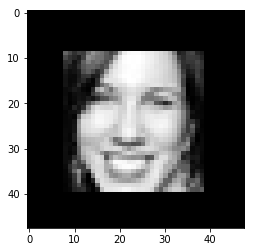

In [102]:
def detect_head():
    
    image = cv2.imread('tmp.png', cv2.CV_8UC1)
    height, width = image.shape[:2]
    
    face_casc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_casc.detectMultiScale(image, scaleFactor=1.1, minNeighbors=3)
    if faces is tuple():
        return False, "Head was not detected", image, (0, 0)
  
    biggest_obj = [0]*5    # biggest_obj = [area, x, y, w, h]
    for (x, y, w, h) in faces:
        biggest_obj.append(w*h)
        if w*h > biggest_obj[0]:
            biggest_obj[0] = w*h
            biggest_obj[1:5] = x, y, w, h    # assume the head is the biggest detected object
    x, y, w, h = biggest_obj[1:5]
    
    image[:,0:x] = 0
    image[0:y,:] = 0
    image[y+h:height,:] = 0
    image[:,x+w:width] = 0
    
    print (image, type(image))
    plt.imshow(image, cmap='gray')
    plt.show()
    
    return True, " ", head, (x, y)

head_bool, comments, head, (x, y) = detect_head()
if head_bool is False:
    print(comments)